# Time-Series Project
### yfinance를 사용한 금융 예측

## 1️⃣ 데이터 로드 및 시각화

In [1]:
import yfinance as yf

# 티커 심볼 설정
kakao = '035720.KS'
gold = '132030.KS'
tickers = [kakao, gold]

# 주가 데이터 다운로드
f_df = yf.download(tickers, start='2011-01-01')['Adj Close'].round(4)

# 열 이름 변경
f_df.rename(columns={kakao: 'KAKAO', gold: 'GOLD'}, inplace=True)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,KAKAO,GOLD
Date,,
2011-01-03,14606.0732,10855.0
2011-01-04,14758.2188,10805.0
2011-01-05,14834.2930,10535.0
2011-01-06,14872.3281,10495.0
2011-01-07,15233.6768,10405.0
...,...,...
2024-06-11,43150.0000,14295.0
2024-06-12,43050.0000,14380.0
2024-06-13,43650.0000,14360.0


In [2]:
f_df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3311 entries, 2011-01-03 to 2024-06-17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KAKAO   3311 non-null   float64
 1   GOLD    3285 non-null   float64
dtypes: float64(2)
memory usage: 77.6 KB


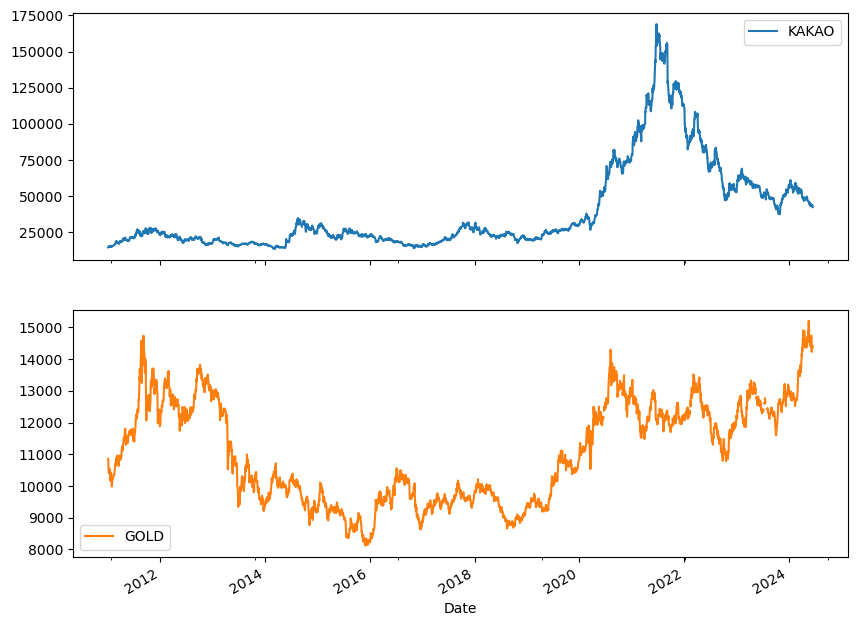

In [3]:
import matplotlib.pyplot as plt

f_df.plot(figsize=(10, 8), subplots=True)
plt.show()

### 🤓 두 종목의 금액 그래프 비교 결과
- 두 그래프 모두 우연변동 시계열이지만 KAKAO의 경우 2020년 이후 상승, 2021년 말부터 하락하는 모습을 보인다.

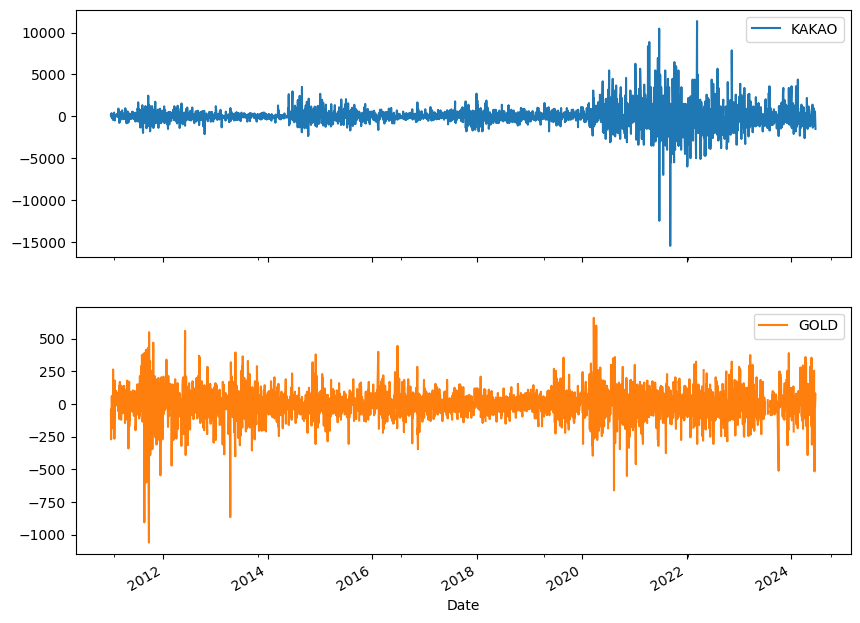

In [4]:
f_df.diff().plot(figsize=(10, 8), subplots=True)
plt.show()

### 🤓 두 종목간의 분산 그래프 비교 결과
- GOLD는 전연도의 걸쳐 비교적 분산이 꽤 일정한 모습을 보인다. 이는 가격변동이 크지 않다는 것을 나타낸다.
- 반면, KAKAO는 2020년도 이후 분산이 급격하게 커지는 모습을 보이며, 이는 해당시기에 가격의 변동이 크다는 것을 나타낸다.

C:\Users\user\AppData\Local\Temp\ipykernel_40764\3958772669.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))


<Axes: xlabel='Ticker'>

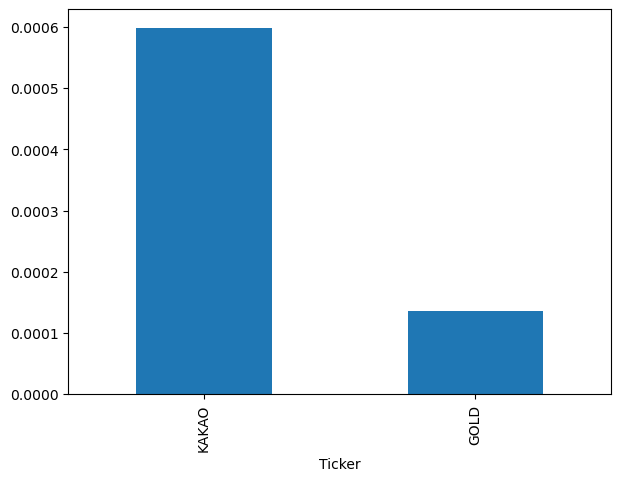

In [5]:
f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))

### 🤓변동성 그래프 확인 결과
- GOLD보다 KAKAO의 변동성이 더 높은 것을 알 수 있다.

## 2️⃣ 수익률을 계산
#### 로그, SHIFT를 통해서 다음날의 가격과 비교한 수익률 계산 후 시각화

In [6]:
import numpy as np

rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,KAKAO,GOLD
Date,,
2011-01-03,NaN,NaN
2011-01-04,0.010363,-0.004617
2011-01-05,0.005141,-0.025306
2011-01-06,0.002561,-0.003804
2011-01-07,0.024006,-0.008612
...,...,...
2024-06-11,0.001159,0.004557
2024-06-12,-0.002320,0.005929
2024-06-13,0.013841,-0.001392


In [124]:
import numpy as np

pre_f_df = f_df / f_df.shift(1)
pre_f_df

Ticker,KAKAO,GOLD
Date,,
2011-01-03,NaN,NaN
2011-01-04,1.010417,0.995394
2011-01-05,1.005155,0.975012
2011-01-06,1.002564,0.996203
2011-01-07,1.024297,0.991424
...,...,...
2024-06-11,1.001160,1.004568
2024-06-12,0.997683,1.005946
2024-06-13,1.013937,0.998609


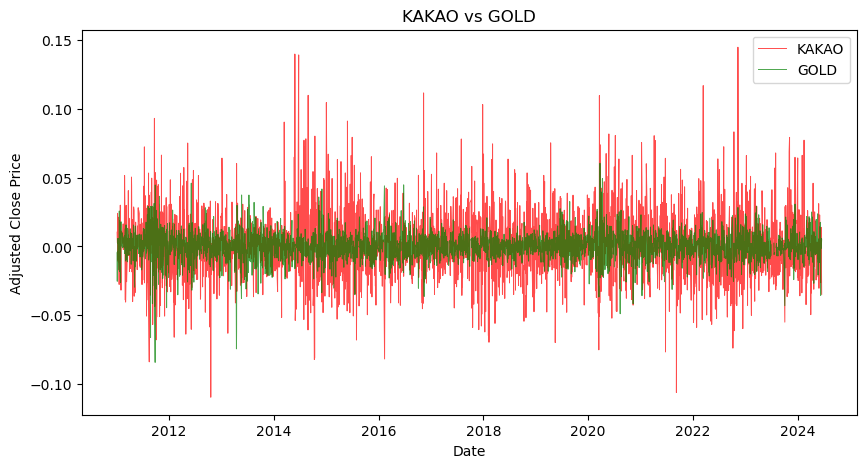

In [8]:
import matplotlib.pyplot as plt

# KAKAO와 GOLD 데이터를 보색으로 플로팅
plt.figure(figsize=(10, 5))
plt.plot(rate_f_df['KAKAO'], label='KAKAO', color='red', linewidth=0.7, alpha=0.7)
plt.plot(rate_f_df['GOLD'], label='GOLD', color='green', linewidth=0.7, alpha=0.7)

# 그래프 제목 및 축 레이블
plt.title('KAKAO vs GOLD')
plt.xlabel('Date')
#종가 조정가격
plt.ylabel('Adjusted Close Price')

# 범례 표시
plt.legend()

# 그래프 보여주기
plt.show()


### 🤓 수익률 로그 그래프의 비교결과
- 카카오의 수익률의 분포가 금 ETF에 비하여 큰 폭으로 변동하는 것을 확인
- 카카오 주식이 금 ETF에 비하여 시장에서 더 큰 변동성을 보이고 있다.

### 수익률 분포 그래프 확인

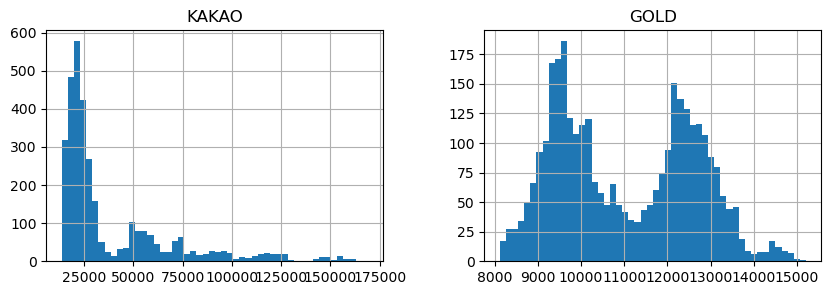

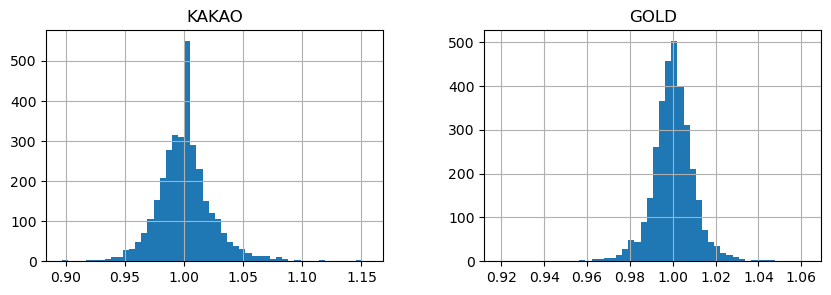

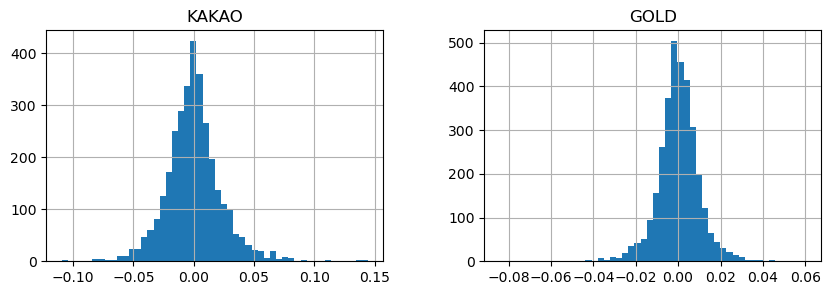

In [125]:
f_df.hist(figsize=(10, 3), bins=50)
pre_f_df.hist(figsize=(10, 3), bins=50)
rate_f_df.hist(figsize=(10, 3), bins=50)
plt.show()

### 🤓 수익률 분포 그래프 확인 결과
- 기존 데이터 프레임의 분포의 경우 정규분포를 따르지 않음을 확인할 수 있다.
- 로그를 취할때와 취하지 않을떄 모두 첨도가 높은 정규분포를 보인다.
- KAKAO의 경우 1에 해당하는 값이 500과 가까운 높은 값을 보이기 떄문에 고른 분포를 위하여 log를 취한는 것이 좋아 보인다.

## 3️⃣ 두 종목의 연관성을 확인
#### VIF 사용

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [11]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,1.002772,KAKAO
1,1.002772,GOLD


### 🤓 두 종목간의 다중공선성 확인 결과
- 두 종목은 독립적이다.

### 일자별 누적 수익률

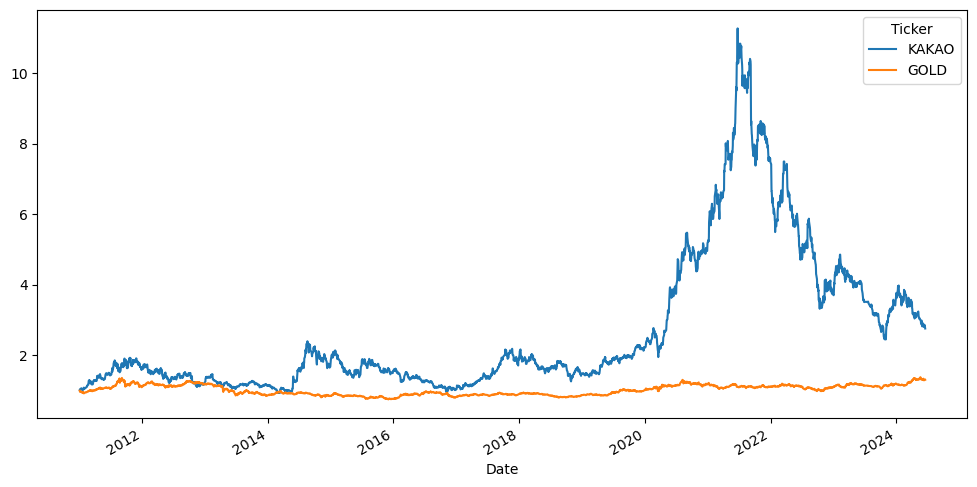

In [12]:
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

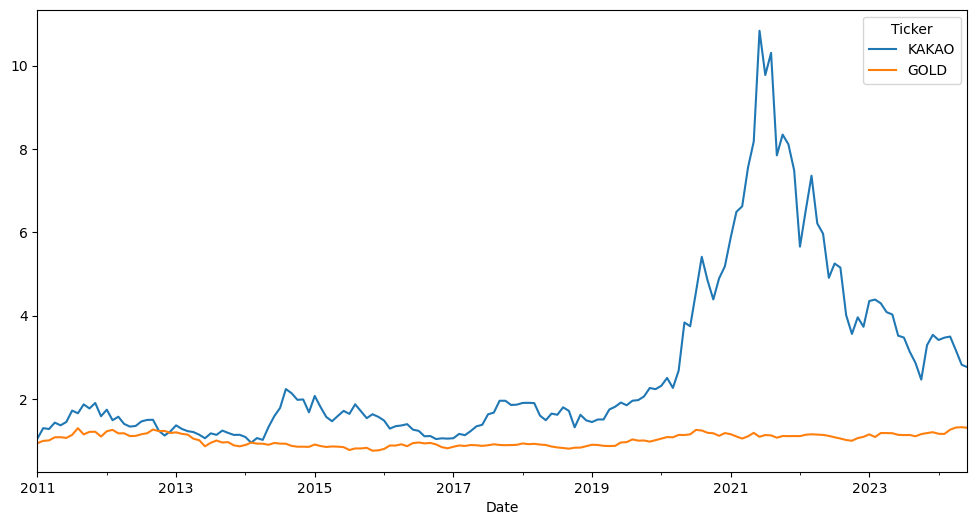

In [13]:
# 월간 수익률
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

### 🤓 주가변동 관련 이슈
- 2014년 5월 다음과의 합병 소식 10월 다음과 합병법인 출범
- 2017년 카카오뱅크 출시. 코스닥에서 유가증권시장으로 이전으로 주가상승
- 2020년 언텍트 시대 카카오 플랫폼, 콘텐츠 사업, 카카오페이, 카카오 모빌리티 등의 실적으로 주가상승
- 2021년 4월 카카오 주식 액면분할
- 2021년 9월 빅테크 흐름 규제, 데이터센터 화재, 스톡옵션 먹튀로 하락세

## 4️⃣ 카카오 주가에 대한 분석

In [14]:
kakao_df = f_df[['KAKAO']].dropna()
kakao_df

Ticker,KAKAO
Date,
2011-01-03,14606.0732
2011-01-04,14758.2188
2011-01-05,14834.2930
2011-01-06,14872.3281
2011-01-07,15233.6768
...,...
2024-06-11,43150.0000
2024-06-12,43050.0000
2024-06-13,43650.0000


## 5️⃣ ARIMA

### 이동 평균 (MA)

In [15]:
window = 2

kakao_df['min'] = kakao_df['KAKAO'].rolling(window=window).min()
kakao_df['mean'] = kakao_df['KAKAO'].rolling(window=window).mean()
kakao_df['std'] = kakao_df['KAKAO'].rolling(window=window).std()
kakao_df['median'] = kakao_df['KAKAO'].rolling(window=window).median()
kakao_df['max'] = kakao_df['KAKAO'].rolling(window=window).max()

kakao_df.dropna()

Ticker,KAKAO,min,mean,std,median,max
Date,,,,,,
2011-01-04,14758.2188,14606.0732,14682.14600,107.583185,14682.14600,14758.2188
2011-01-05,14834.2930,14758.2188,14796.25590,53.792583,14796.25590,14834.2930
2011-01-06,14872.3281,14834.2930,14853.31055,26.894877,14853.31055,14872.3281
2011-01-07,15233.6768,14872.3281,15053.00245,255.512116,15053.00245,15233.6768
2011-01-10,15081.5303,15081.5303,15157.60355,107.583822,15157.60355,15233.6768
...,...,...,...,...,...,...
2024-06-11,43150.0000,43100.0000,43125.00000,35.355340,43125.00000,43150.0000
2024-06-12,43050.0000,43050.0000,43100.00000,70.710678,43100.00000,43150.0000
2024-06-13,43650.0000,43050.0000,43350.00000,424.264069,43350.00000,43650.0000


### 🤓 각 집계함수 적용 결과
- 평균과 중앙값이 거의 비슷하게 나타나므로 정규분포를 따르는 값임을 알 수 잇따.
- 이에따라 최소값, 평균, 최대값을 통한 그래프를 시각화 한다.

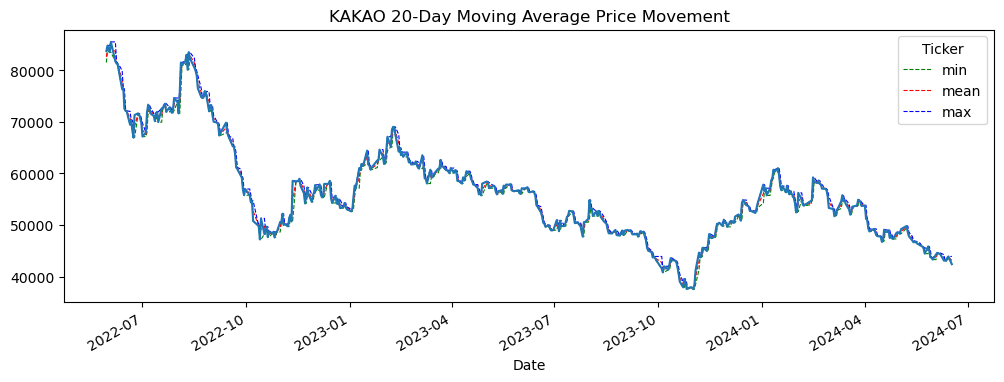

In [16]:
import matplotlib.pyplot as plt

ax = kakao_df[['min', 'mean', 'max']].iloc[-504:].plot(figsize=(12, 4), style=['g--', 'r--', 'b--'], lw=0.8)
kakao_df['KAKAO'].iloc[-504:].plot(ax=ax)
plt.title("KAKAO 20-Day Moving Average Price Movement")
plt.show()

In [17]:
window = 20

kakao_df['min'] = kakao_df['KAKAO'].rolling(window=window).min()
kakao_df['mean'] = kakao_df['KAKAO'].rolling(window=window).mean()
kakao_df['std'] = kakao_df['KAKAO'].rolling(window=window).std()
kakao_df['median'] = kakao_df['KAKAO'].rolling(window=window).median()
kakao_df['max'] = kakao_df['KAKAO'].rolling(window=window).max()

kakao_df.dropna()

Ticker,KAKAO,min,mean,std,median,max
Date,,,,,,
2011-01-28,15823.2441,14606.0732,15175.670755,321.064513,15176.6211,15823.2441
2011-01-31,15328.7676,14758.2188,15211.805475,293.028552,15233.6768,15823.2441
2011-02-01,15499.9326,14834.2930,15248.891165,279.211136,15233.6768,15823.2441
2011-02-07,15652.0811,14872.3281,15289.780570,275.150670,15281.2222,15823.2441
2011-02-08,15785.2100,14948.4023,15335.424665,277.959294,15328.7676,15823.2441
...,...,...,...,...,...,...
2024-06-11,43150.0000,43100.0000,45010.000000,1270.474424,44850.0000,47000.0000
2024-06-12,43050.0000,43050.0000,44812.500000,1251.722497,44575.0000,46800.0000
2024-06-13,43650.0000,43050.0000,44662.500000,1198.559991,44500.0000,46800.0000


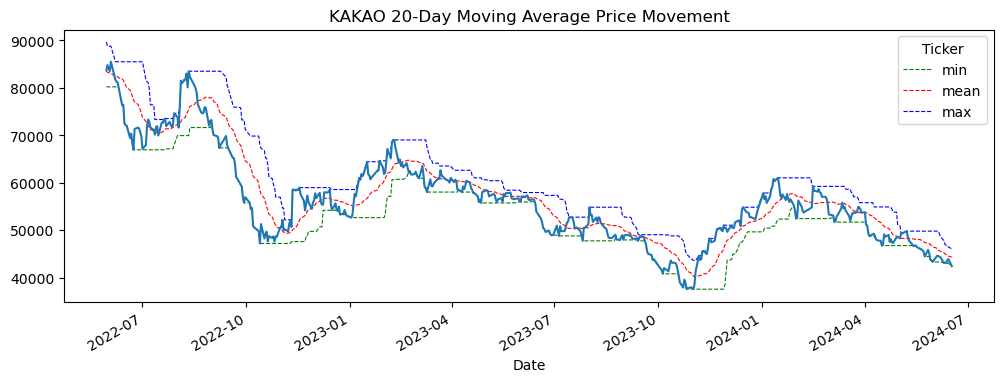

In [18]:
import matplotlib.pyplot as plt

ax = kakao_df[['min', 'mean', 'max']].iloc[-504:].plot(figsize=(12, 4), style=['g--', 'r--', 'b--'], lw=0.8)
kakao_df['KAKAO'].iloc[-504:].plot(ax=ax)
plt.title("KAKAO 20-Day Moving Average Price Movement")
plt.show()

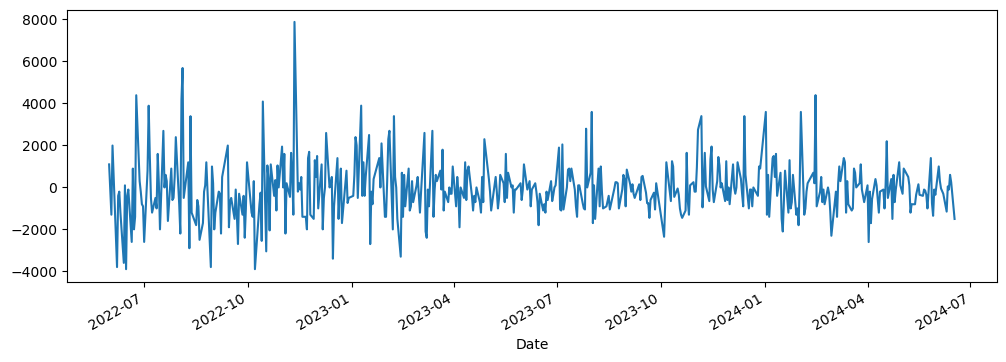

In [19]:
kakao_df['KAKAO'].iloc[-504:].diff().plot(figsize=(12,4), subplots=True)
plt.show()

### 🤓 이동평균 집계함수 그래프 확인 결과
- 이동 평균의 window사이즈를 작게 주었을 경우 최소값과 최댁값, 평균의 차이가 근소한 것을 확인 할 수 있다.
- 해당 그래프로 데이터의 세부적인 변동을 확인할 수 있다.
- 이동 평균의 window 사이즈를 크게 주어 데이터의 전반적인 변동성을 줄이고, 그래프를 뽑아 보았을 때,
- 결과적으로 분산이 상대적으로 일정한 모습을 확인할 수 있다.
- 2022년 12월쯤 diff 그래프의 수치가 급격히 상승하는 부분또한 window사이즈를 크게하여 rolling 하였으므로 최댓갑과 최소값의 폭이 적게 나타난다.
- 즉, 이전보다 이상치에 덜 민감해 졌음을 알 수 있다.
  

### SMA(Simple Moving Average)

In [20]:
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정
kakao_df_2014 = kakao_df['2014-01-01':].copy()  

kakao_df_2014['SMA1'] = kakao_df_2014['KAKAO'].rolling(window=21).mean() #short-term
kakao_df_2014['SMA2'] = kakao_df_2014['KAKAO'].rolling(window=252).mean() #long-term
kakao_df_2014[['KAKAO', 'SMA1', 'SMA2']].tail()

Ticker,KAKAO,SMA1,SMA2
Date,,,
2024-06-11,43150.0,45142.857143,50194.468829
2024-06-12,43050.0,44916.666667,50142.525795
2024-06-13,43650.0,44757.142857,50093.360120
2024-06-14,43900.0,44626.190476,50040.826111
2024-06-17,42400.0,44416.666667,49982.736128


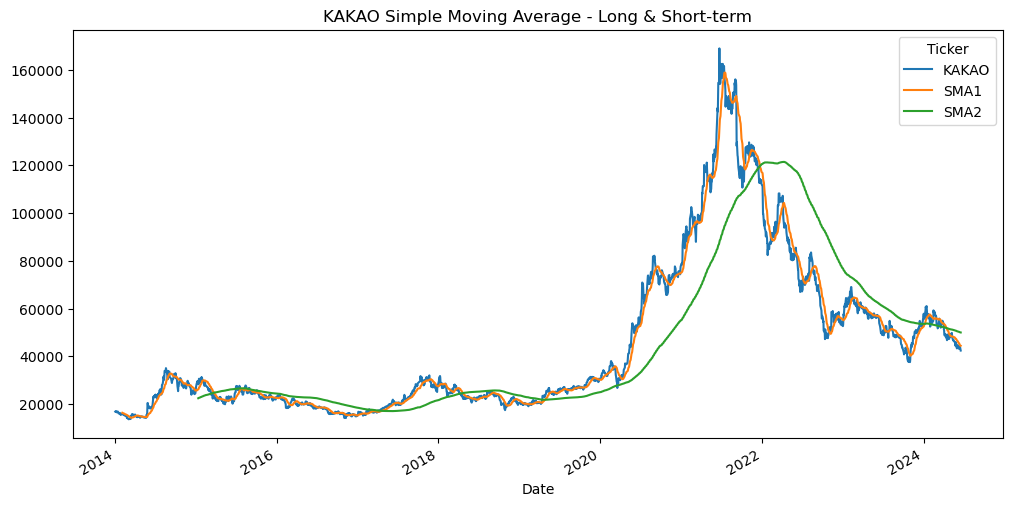

In [21]:
kakao_df_2014[['KAKAO', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("KAKAO Simple Moving Average - Long & Short-term")
plt.show()

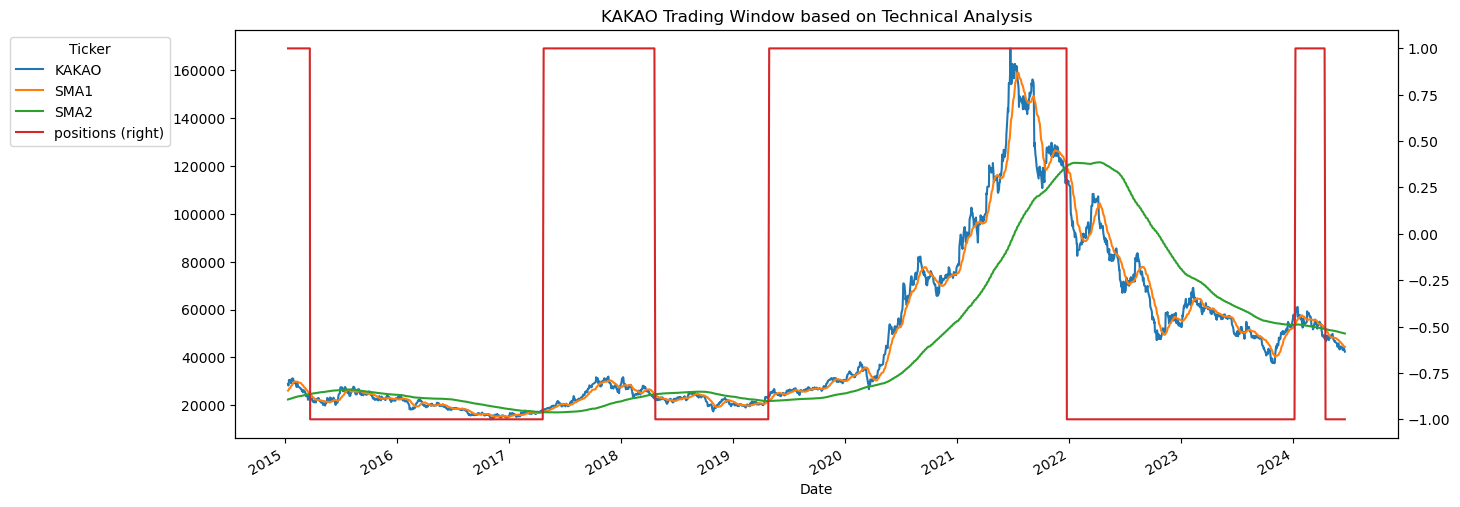

In [22]:
kakao_df_2014.dropna(inplace=True)

kakao_df_2014['positions'] = np.where(kakao_df_2014['SMA1'] > kakao_df_2014['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = kakao_df_2014[['KAKAO', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("KAKAO Trading Window based on Technical Analysis")
plt.show()

### 🤓 SMA를 통한 주가 분석 그래프 확인 결과
- 2014년부터 SMA를 통한 그래프르 시각화 한 결과,
- 2015년 1분기(매도) 데드 크로스가 나타나며, 단기 이동 평균선이 장기 이동 평균선 아래에 위치한다.
- 2017년 1분기(매수) 골든 크로스가 나타나며 이후 단기 이동 평균선이 장기 이동 평균선 위로 위치한다.
- 2018년 1분기(매도) 데드크로스가 나타나며 해당 기간 후 단기 이동 평균선이 장기 이동 평균선 아래에 위치한다.
- 2019년 1분기(매수) 골든 크로스가 나타나며, 골든 크로스 이후 2022년 데드 크로스가 나타나기 전까지 단기 이동 평균이 장기보다 위에 위치한다.
- 2022년의 시작에 나타난 데드 크로스 이후 2024년도까지 장기 이동 평균이 단기 이동평균보다 위에 위치한다.

## 6️⃣ 카카오 주가 예측

In [23]:
import yfinance as yf

# 티커 심볼 설정
kakao = '035720.KS'
gold = '132030.KS'
tickers = [kakao, gold]

# 주가 데이터 다운로드
f_df = yf.download(tickers, start='2011-01-01')['Adj Close'].round(4)

# 열 이름 변경
f_df.rename(columns={kakao: 'KAKAO', gold: 'GOLD'}, inplace=True)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,KAKAO,GOLD
Date,,
2011-01-03,14606.0713,10855.0
2011-01-04,14758.2178,10805.0
2011-01-05,14834.2910,10535.0
2011-01-06,14872.3271,10495.0
2011-01-07,15233.6777,10405.0
...,...,...
2024-06-11,43150.0000,14295.0
2024-06-12,43050.0000,14380.0
2024-06-13,43650.0000,14360.0


In [24]:
pre_f_df = f_df.dropna()
pre_f_df

Ticker,KAKAO,GOLD
Date,,
2011-01-03,14606.0713,10855.0
2011-01-04,14758.2178,10805.0
2011-01-05,14834.2910,10535.0
2011-01-06,14872.3271,10495.0
2011-01-07,15233.6777,10405.0
...,...,...
2024-06-11,43150.0000,14295.0
2024-06-12,43050.0000,14380.0
2024-06-13,43650.0000,14360.0


In [25]:
kakao_df = pre_f_df[['KAKAO']].iloc[-756:]
kakao_df

Ticker,KAKAO
Date,
2021-04-22,117189.6172
2021-04-23,117189.6172
2021-04-26,117688.2891
2021-04-27,121179.0469
2021-04-28,119184.3281
...,...
2024-06-11,43150.0000
2024-06-12,43050.0000
2024-06-13,43650.0000


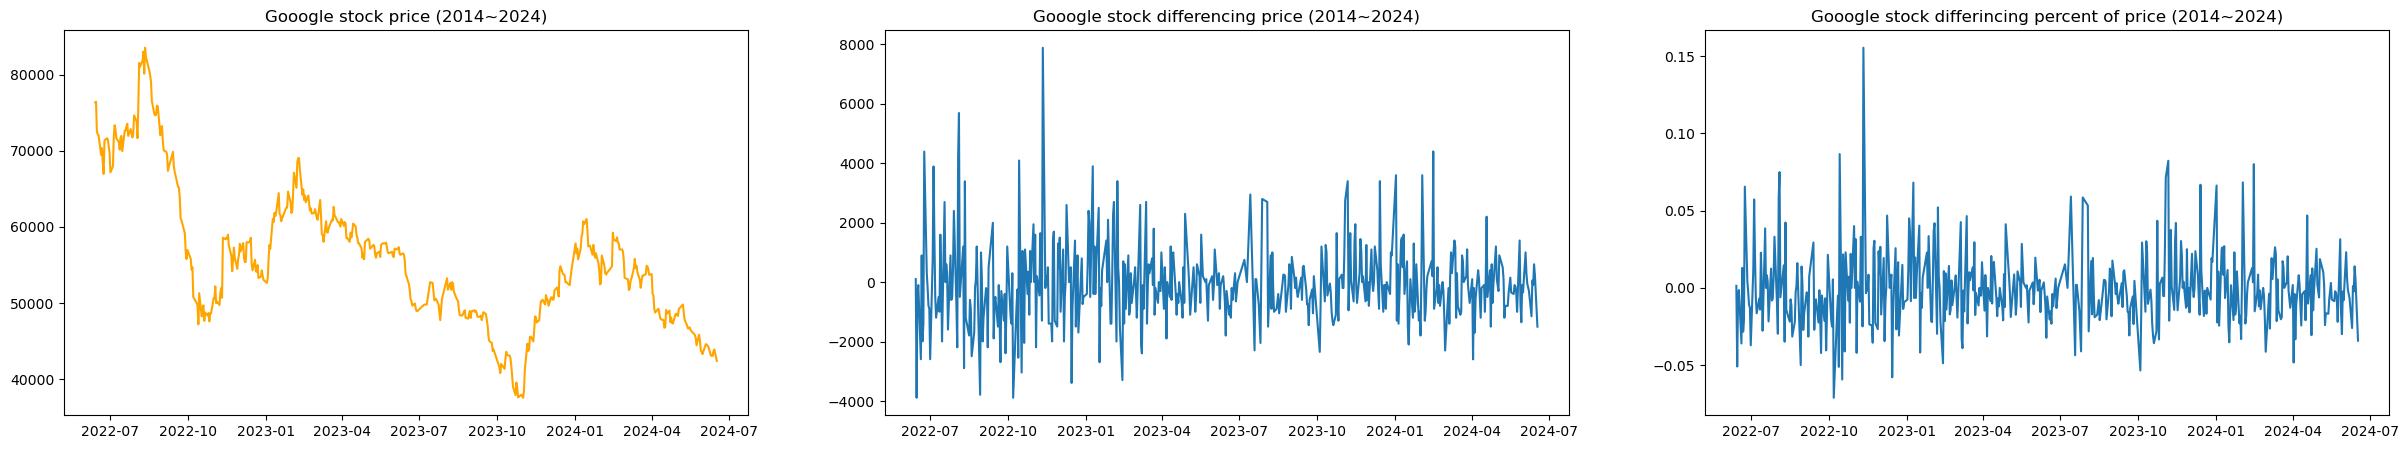

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
plt.plot(kakao_df, c='orange')
plt.title('Gooogle stock price (2014~2024)')

plt.subplot(1, 3, 2)
plt.plot(kakao_df.diff())
plt.title('Gooogle stock differencing price (2014~2024)')

plt.subplot(1, 3, 3)
plt.plot(kakao_df.pct_change())
plt.title('Gooogle stock differincing percent of price (2014~2024)')

plt.show()

### ⏹️ acf와 pacf 확인 (lag(시차) = 20) 및 전처리

In [28]:
import numpy as np
from statsmodels.tsa.stattools import acf

kakao_df.dropna(inplace=True)
kakao_diff_df = kakao_df.diff().dropna()

kakao_acf = acf(kakao_df, nlags=20)
kakao_diff_acf = acf(kakao_diff_df, nlags=20)

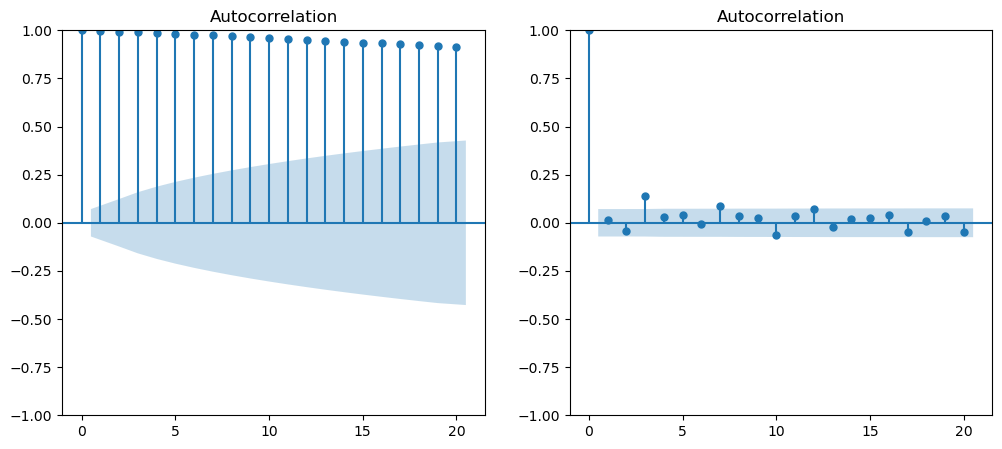

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(kakao_df, lags=20, ax=ax[0])
plot_acf(kakao_diff_df, lags=20, ax=ax[1])
plt.show()

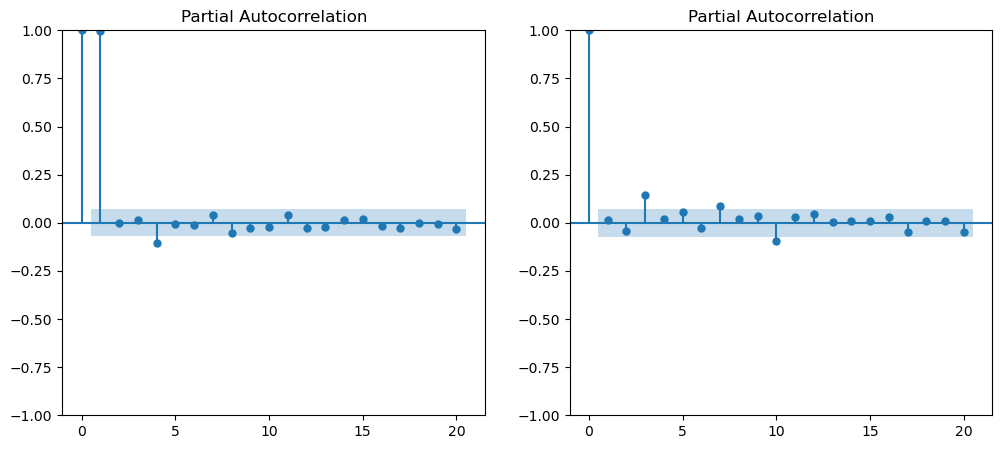

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_pacf(kakao_df, lags=20, ax=ax[0])
plot_pacf(kakao_diff_df, lags=20, ax=ax[1])
plt.show()

### ⏹️ MA적용 전후 분포 확인

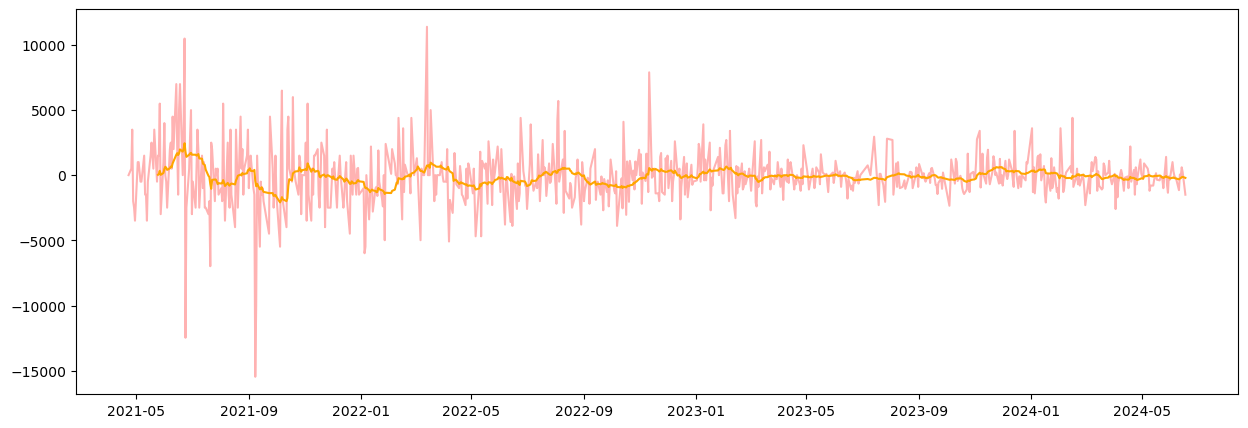

In [31]:
import matplotlib.pyplot as plt

window_size = 21

plt.figure(figsize=(15, 5))

plt.plot(kakao_df.diff().dropna(), c='red', alpha=0.3)
plt.plot(kakao_df.diff().dropna().rolling(window_size).mean(), c='orange')
plt.show()

### ⏹️ 데이터 세트 분할

In [26]:
y_train = kakao_df['KAKAO'][:int(0.8 * len(kakao_df))]
y_test = kakao_df['KAKAO'][int(0.8 * len(kakao_df)):]

<Axes: xlabel='Date'>

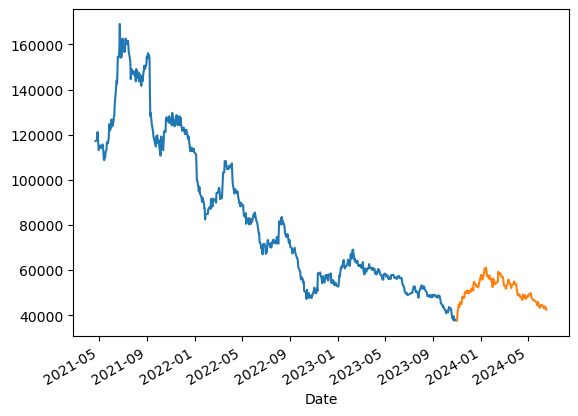

In [32]:
y_train.plot()
y_test.plot()

### ⏹️ 영가설 검증 및 모델 훈련 

In [128]:
from pmdarima.arima import ndiffs

kpss_diffs= ndiffs(y_train, alpha=0.05, test = 'kpss', max_d =6)
adf_diffs= ndiffs(y_train, alpha=0.05, test = 'adf', max_d =6)
pp_diffs= ndiffs(y_train, alpha=0.05, test = 'pp', max_d =6)

n_diffs = max(kpss_diffs,adf_diffs, pp_diffs)

print(f'd={n_diffs}')

d=1


In [127]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, 
                      d=1, 
                      start_p = 0, 
                      max_p = 6, 
                      start_q=0, 
                      max_q=6, 
                      m=1, 
                      seasonal =False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11011.394, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11013.355, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11013.355, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11011.501, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11015.547, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.274 seconds


In [35]:
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [36]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  604
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5503.697
Date:                Mon, 17 Jun 2024   AIC                          11011.394
Time:                        13:13:51   BIC                          11020.198
Sample:                             0   HQIC                         11014.820
                                - 604                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -131.7251     90.981     -1.448      0.148    -310.045      46.594
sigma2      4.958e+06    1.3e+05     38.169      0.000     4.7e+06    5.21e+06
Ljung-Box (L1) (Q):                   0.09   Jarque-

- Prob(통계량):
    - Q : 잔차가 백색잡음 시계열을 따른다는 영가설이 0.76으로 참이므로 잔차들은 서로 독립이고 동일한 분포를 보인다.
    - H : 잔차가 이분산성을 띄지 않는다는 영가설이 0.00으로 거짓이므로 잔차의 분산은 시간에 따라 일정하지 않은 모습을 보인다.
    - JB: 잔차가 정규성을 따른다는 영가설이 0.00으로 거짓이므로 평균과 분산이 일정하지 않다고 볼 수 있다.
- Skew (왜도)와 Kurtosis (첨도):
    - Skew는 -0.26으로 대칭성을 나타내며 0에 근접한 수치로 데이터는 왼쪽으로 살짝 치우치게 나타나고 데이터의 양의 방향으로 꼬리가 두껍게 나타난다.
    - Kurtosis는 10.73으로 뾰족한 정도가 높으며, 분포가 안정적인 형태를 보인다.

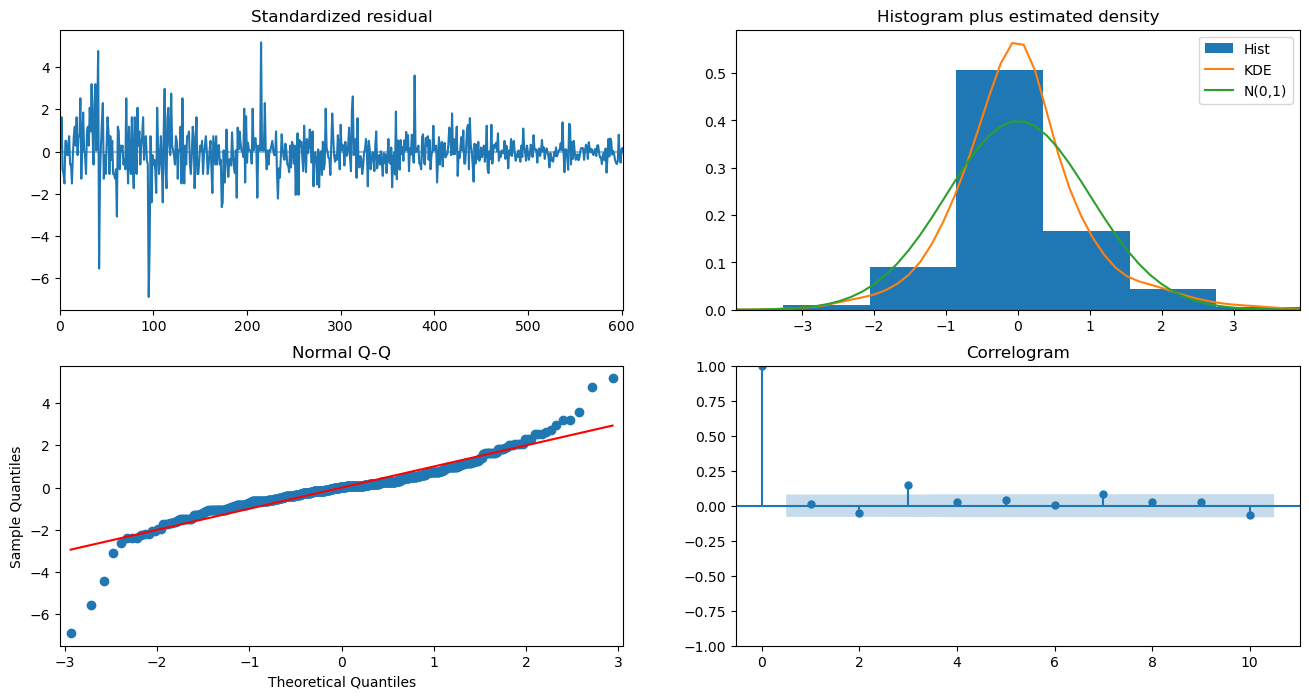

In [37]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16,8))
plt.show()

### 🤓 모델의 그래프 확인 결과
- 표준화 잔차가 비교적 고른 분포를 보인다.
- 히스토그램의 경우 정규분포를 보이지만 첨도가 높게 나타난다.
- 정규 Q-Q 플롯의 경우 잔차가 대부분 정규분포를 따르지만 양극단의 값은 정규분포에서 벗어나 있음을 보여준다.

In [38]:
prediction = model.predict(n_periods=len(y_test))
prediction

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


604    37627.681140
605    37495.956081
606    37364.231021
607    37232.505961
608    37100.780901
           ...     
751    18264.097364
752    18132.372304
753    18000.647245
754    17868.922185
755    17737.197125
Length: 152, dtype: float64

In [39]:
prediction, conf_int = model.predict(n_periods=1, return_conf_int= True)
print(conf_int)
print(prediction)

[[33263.52675316 41991.83552743]]
604    37627.68114
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
prediction.tolist()[0]

37627.681140298504

In [41]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [42]:
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2023-11-01,37559.6211,37627.681140
2023-11-02,38508.5977,37427.896040
2023-11-03,41255.6445,38376.872640
2023-11-06,44651.9961,41123.919440
2023-11-07,43703.0156,44520.271040
...,...,...
2024-06-11,43150.0000,43003.040606
2024-06-12,43050.0000,43053.040606
2024-06-13,43650.0000,42953.040606


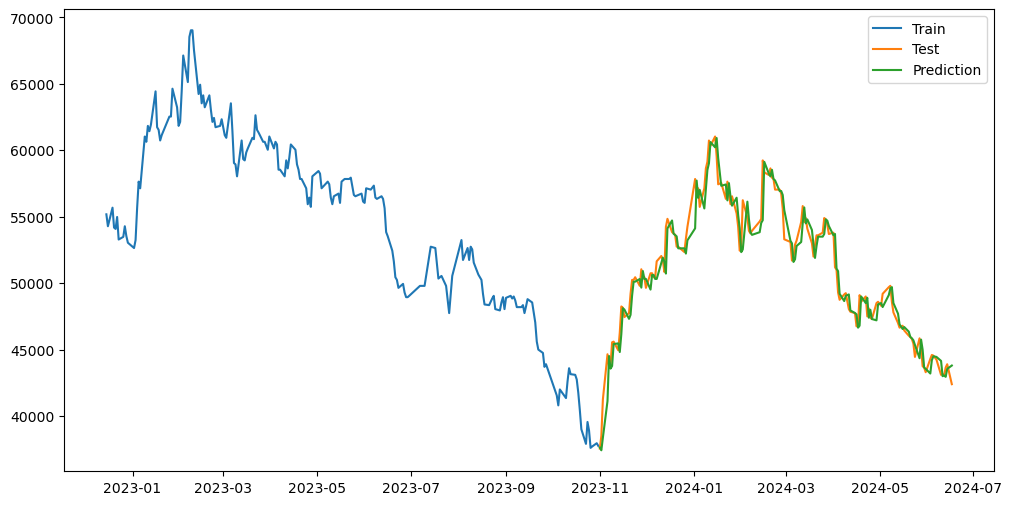

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train.iloc[-200:], label='Train')
plt.plot(y_test.iloc[-200:], label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [45]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred)/ y_test)) * 100

print(f'MAPE (%) : {MAPE(y_test, p_list):.4f}%')

MAPE (%) : 1.5990%


### MAPE(Mean Absolute Percentage Error) 및 예측 그래프 확인 결과
- 해당 예측은 예측값을 누적으로 처리하여 고르게 감소하는 그래프를 보였으며, 이러한 오류를 방지하기 위하여 predict_one_step 함수를 사용
- predict 에서 return 한 값을 다시 그래프로 나타낸 결과 실제값과 예측값이 비슷한 것을 확인
- 하지만 이 경우 실제값이 있어야만 하며, 미래를 예측하기 힘들기 때문에 prophet을 사용하여 예측

### 7️⃣ Prophet을 통한 예측 (2022-06~)

In [100]:
pre_kakao_df = kakao_df.iloc[-480:].reset_index()
pre_kakao_df = pre_kakao_df.rename(columns={'Date':'ds','KAKAO':'y'})
pre_kakao_df

Ticker,ds,y
0,2022-06-13,76333.5625
1,2022-06-14,76433.3438
2,2022-06-15,72541.8281
3,2022-06-16,72142.6953
4,2022-06-17,72042.9141
...,...,...
475,2024-06-11,43150.0000
476,2024-06-12,43050.0000
477,2024-06-13,43650.0000
478,2024-06-14,43900.0000


In [101]:
pre_kakao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      480 non-null    datetime64[ns]
 1   y       480 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


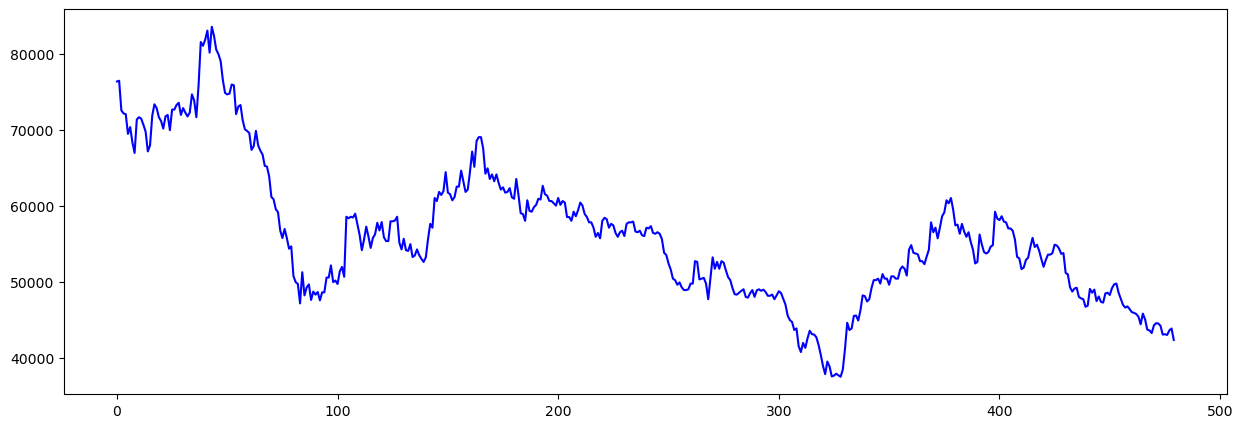

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(pre_kakao_df['y'], c='blue')
plt.show()

### ⏹️ 모델 선언 및 fit

In [103]:
from prophet import Prophet

model = Prophet().fit(pre_kakao_df)

13:26:00 - cmdstanpy - INFO - Chain [1] start processing
13:26:00 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13,75390.292734,72915.493246,77950.539714
1,2022-06-14,75063.799940,72601.937832,77663.038434
2,2022-06-15,74525.841892,72168.234574,77203.461104
3,2022-06-16,74209.112741,71616.352738,76694.006083
4,2022-06-17,74067.818318,71619.548525,76626.563668


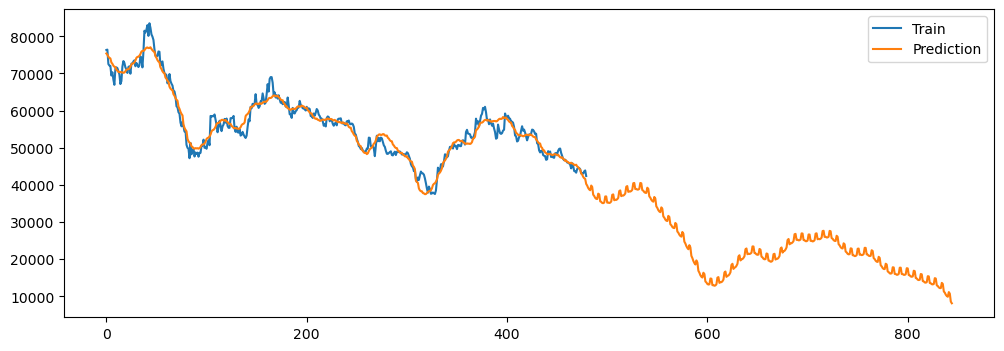

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

plt.plot(pre_kakao_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


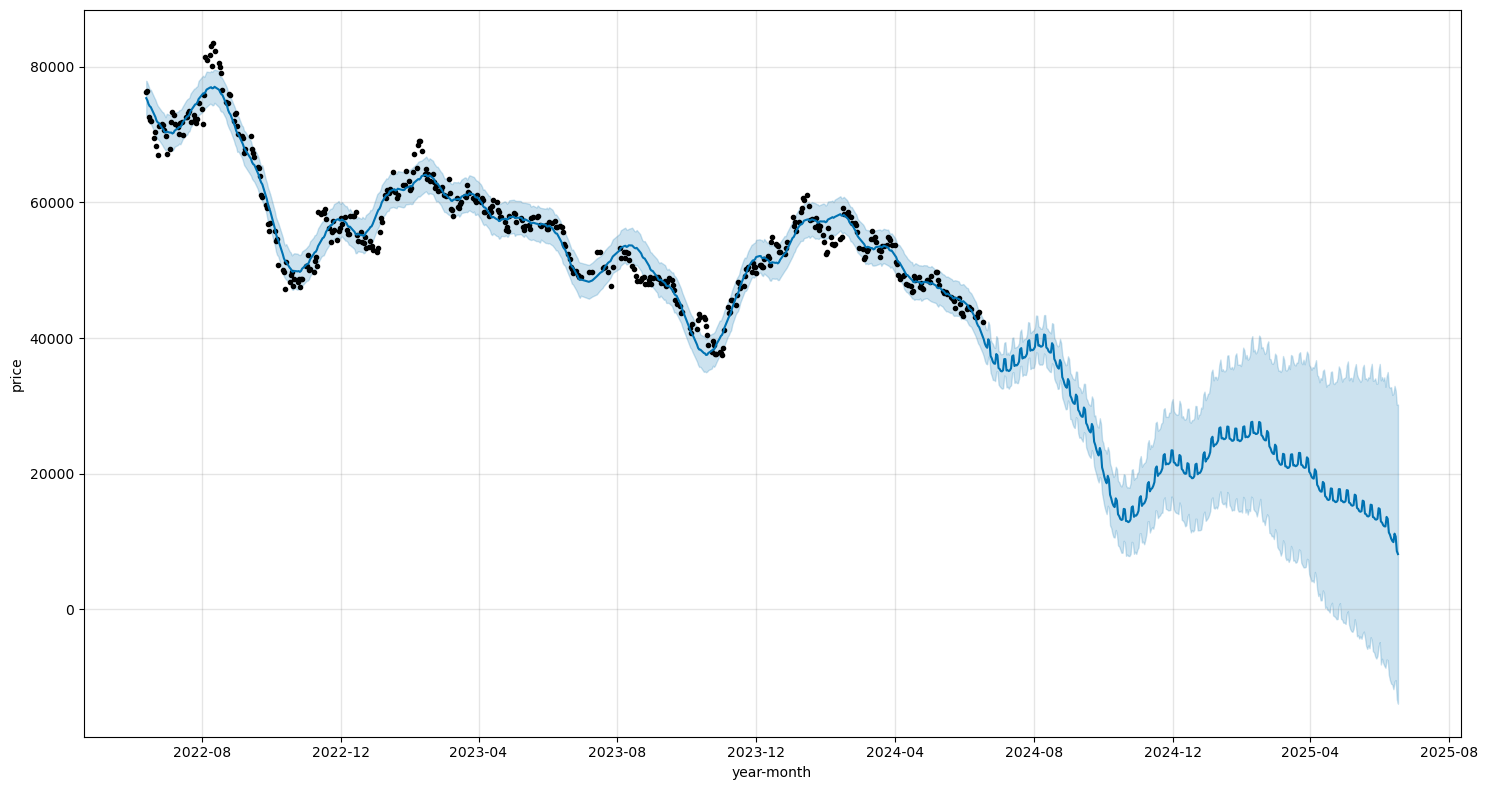

In [106]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

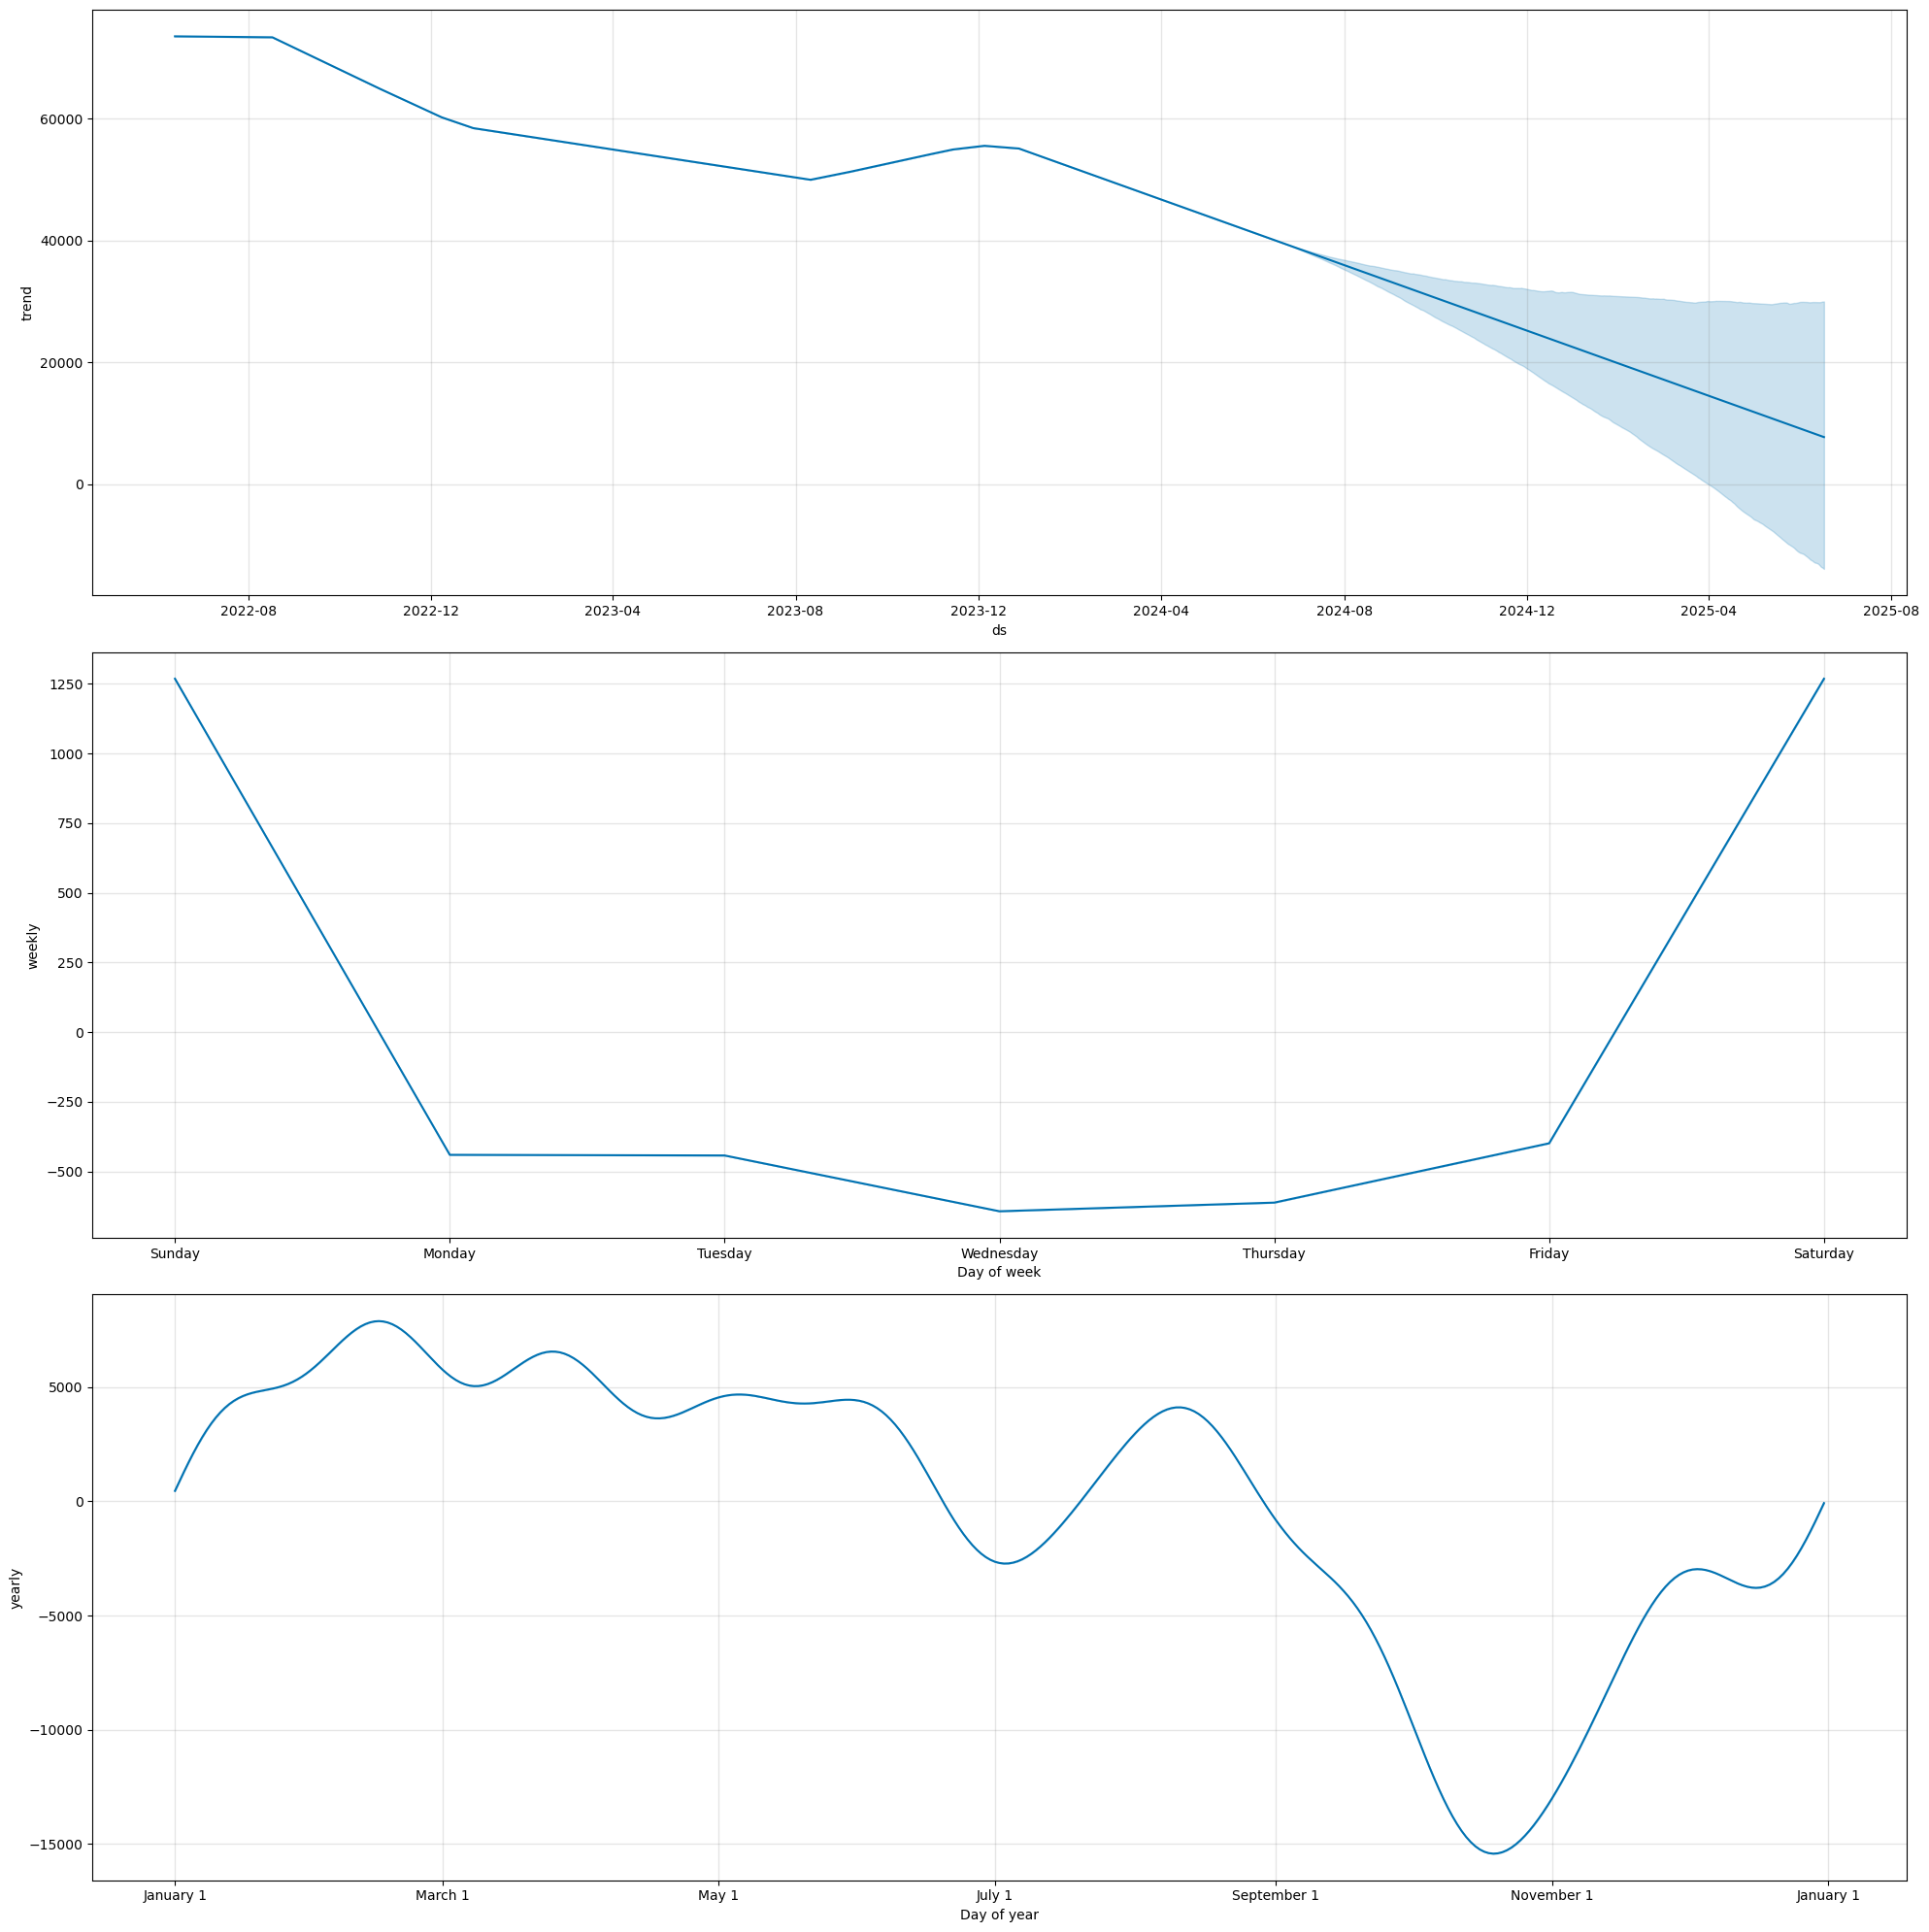

In [107]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

### ⏹️ 훈련데이터를 분할 하여 예측 진행

In [109]:
train_df = pre_kakao_df.iloc[:int(len(pre_kakao_df)*0.8)]
train_df

Ticker,ds,y
0,2022-06-13,76333.5625
1,2022-06-14,76433.3438
2,2022-06-15,72541.8281
3,2022-06-16,72142.6953
4,2022-06-17,72042.9141
...,...,...
379,2024-01-16,59535.9922
380,2024-01-17,57438.2461
381,2024-01-19,57538.1406
382,2024-01-22,56339.4297


### ⏹️ 최적의 파라미터 조합  

In [110]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
# 경우의 수 조합
import itertools

search_space = {
    'changepoint_prior_scale':[0.05,0.1,0.5,1.0,5.0,10.0],
    'seasonality_prior_scale': [0.05,0.1,1.0,10.0],
    'seasonality_mode':['additive','multiplicative']
}

param_combinded  = [dict(zip(search_space.keys(),v)) for v in itertools.product(*search_space.values())]


train_len = int(len(pre_kakao_df)*0.8)
test_len = int(len(pre_kakao_df)*0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'

train_df = pre_kakao_df.iloc[:train_len] 
test_df =pre_kakao_df.iloc[train_len:] 

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes

13:26:33 - cmdstanpy - INFO - Chain [1] start processing
13:26:33 - cmdstanpy - INFO - Chain [1] done processing
13:26:35 - cmdstanpy - INFO - Chain [1] start processing
13:26:35 - cmdstanpy - INFO - Chain [1] done processing
13:26:36 - cmdstanpy - INFO - Chain [1] start processing
13:26:36 - cmdstanpy - INFO - Chain [1] done processing
13:26:38 - cmdstanpy - INFO - Chain [1] start processing
13:26:38 - cmdstanpy - INFO - Chain [1] done processing
13:26:39 - cmdstanpy - INFO - Chain [1] start processing
13:26:39 - cmdstanpy - INFO - Chain [1] done processing
13:26:41 - cmdstanpy - INFO - Chain [1] start processing
13:26:41 - cmdstanpy - INFO - Chain [1] done processing
13:26:43 - cmdstanpy - INFO - Chain [1] start processing
13:26:43 - cmdstanpy - INFO - Chain [1] done processing
13:26:44 - cmdstanpy - INFO - Chain [1] start processing
13:26:44 - cmdstanpy - INFO - Chain [1] done processing
13:26:46 - cmdstanpy - INFO - Chain [1] start processing
13:26:46 - cmdstanpy - INFO - Chain [1]

In [111]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
2,0.05,0.10,additive,0.106121
6,0.05,10.00,additive,0.106407
1,0.05,0.05,multiplicative,0.106553
4,0.05,1.00,additive,0.106581
47,10.00,10.00,multiplicative,0.106678
42,10.00,0.10,additive,0.106679
38,5.00,10.00,additive,0.106686
37,5.00,1.00,multiplicative,0.106688
39,5.00,10.00,multiplicative,0.106688
45,10.00,1.00,multiplicative,0.106696


In [117]:
model = Prophet(changepoint_prior_scale=0.05, 
                seasonality_prior_scale=0.10, 
                seasonality_mode='additive')

model.fit(pre_kakao_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

13:28:36 - cmdstanpy - INFO - Chain [1] start processing
13:28:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
840,2025-06-13,9704.629097,-10833.004300,32268.166723
841,2025-06-14,9288.113711,-10354.353934,31583.026690
842,2025-06-15,8861.448044,-11252.415173,32091.927430
843,2025-06-16,8388.294903,-11946.908097,31233.110603
844,2025-06-17,7941.880314,-12843.860966,31413.870005


In [118]:
kakao_df = pre_kakao_df.copy()
kakao_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

kakao_df.index = pd.to_datetime(kakao_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

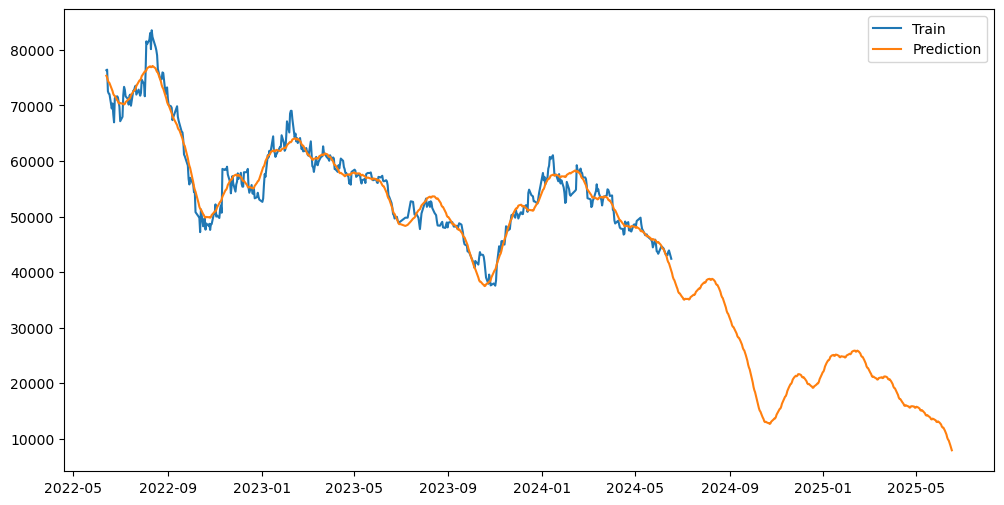

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(kakao_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


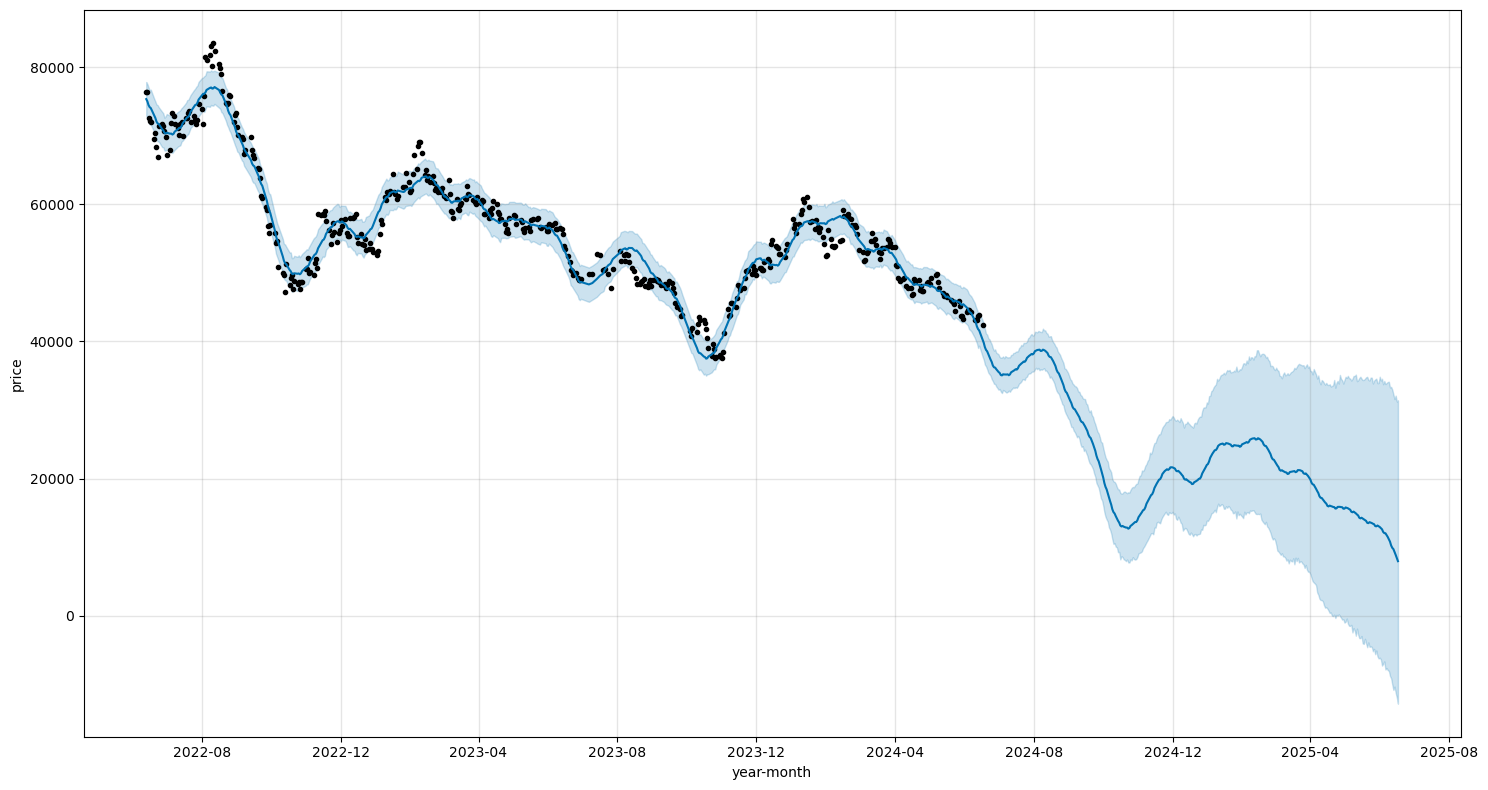

In [120]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

### 🤓 예측 그래프 확인 결과
- 카카오의 주식은 2024년 6월 17일 현시점을 기준으로 하락하는 모습을 보인다.
- 예측 최댓값 경우 2024년 9월 경까지 하락 후 반등하는 모습을 보이지만
- 예측 최솟값의 경우 꾸준한 하락세를 보인다. 

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

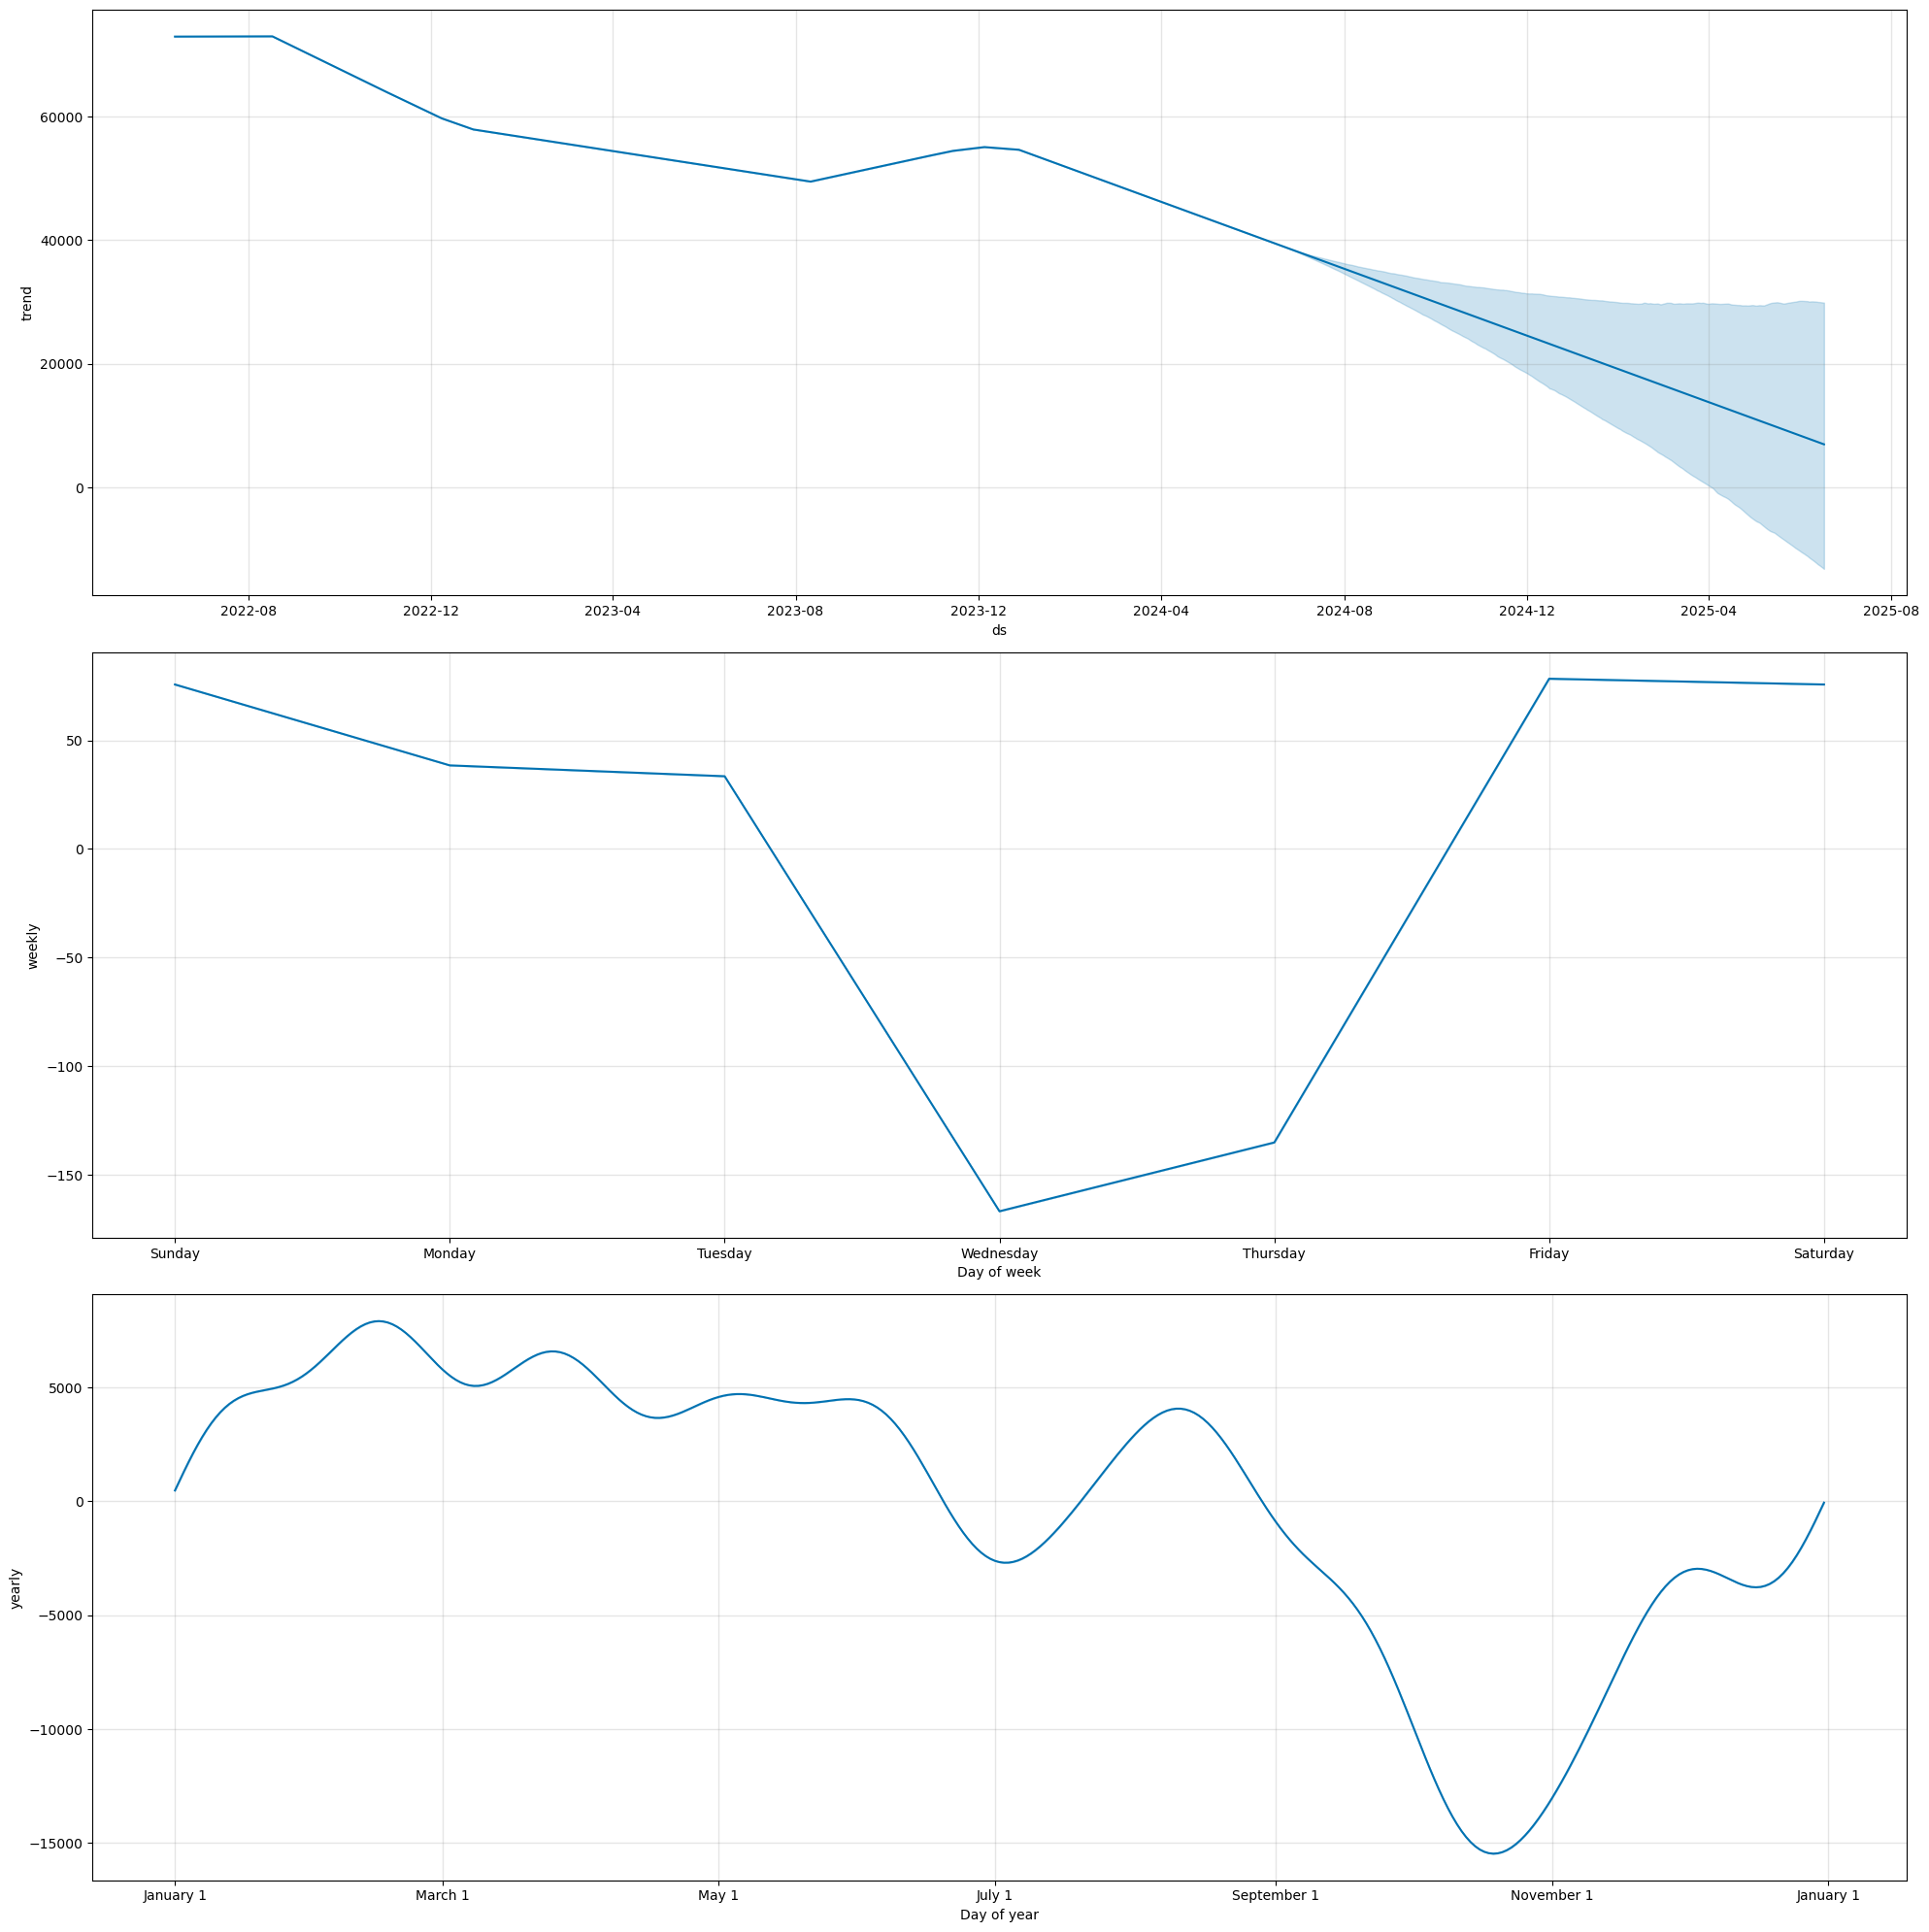

In [121]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

## 🚩 결론

- 카카오 주식 예측의 경우 현 시점 이후로 하락 하는 추세를 보인다.
- 요일별 주가는 금요일이 제일 높은 금액으로 나타나며, 수요일이 가장 낮게 나타난다.
- 연간 그래프를 보면 2월 말 경이 가장 높은 수치를 보이며 10월 말 경이 가장 낮은 수치를 나타낸다.
- 카카오의 경우 2021년 10월 경 최고점을 찍은 후 꾸준히 하락할 것으로 예상된다.
- 지금이 최고점입니다. 매도 하세요.